In [61]:
import pandas as pd
import json
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

plotly.offline.init_notebook_mode(connected=True) 

%matplotlib inline

In [30]:
def read_formatted_jsons(INDIR):
    generation_dfs = []
    stats_dicts = []
    
    for domain in os.listdir(INDIR):
        for fname in glob.glob(INDIR+domain+"/*.json"):

            org_id = os.path.basename(fname).strip(".json")

            with open(fname) as f:
                datajson = json.load(f)

            datajson["stats"]["org_id"] = org_id
            datajson["stats"]["domain"] = domain
            datajson["stats"]["path"] = fname

            stats_dicts.append(datajson["stats"])
            generation_dfs.append(pd.DataFrame(datajson["generations"]))
            
    return generation_dfs, stats_dicts

### Transpose etc.

In [31]:
def twist_dfs(df_list):
    twisted_dfs = []
    for df in df_list:
        df = df.transpose()
        df.index = df.index.astype(int)
        df = df.sort_index()   
        twisted_dfs.append(df)
    return twisted_dfs

### Add `n` columns

In [32]:
def add_n_to_cols(df_list):
    for df in df_list:
        original_columns = df.columns
        for col in original_columns:
            df["n_"+col] = df[col].str.len() 
    return df_list

### Add domain and org_id

In [33]:
def add_domain_and_orgid(df_list,stats_dicts):
    for i,df in enumerate(df_list):
        df['org_id'] = stats_dicts[i]["org_id"]
        df['domain'] = stats_dicts[i]["domain"]
    return df_list

### Add tags if desired

In [34]:
def add_tags(df_list,cpds_to_tag):
    for df in df_list:
        df['tags'] = df['compounds_new'].apply(lambda x: [cpd for cpd in cpds_to_tag if cpd in x])
    return df_list

### Main

In [37]:
cpds_to_tag = []

INDIR = "../results/formatted/ph_edge_jsons/"

generation_dfs, stats_dicts = read_formatted_jsons(INDIR)
generation_dfs = twist_dfs(generation_dfs)
generation_dfs = add_n_to_cols(generation_dfs)
# generation_dfs = add_tags(generation_dfs,cpds_to_tag)
generation_dfs = add_domain_and_orgid(generation_dfs,stats_dicts)
df = pd.concat(generation_dfs)

In [38]:
df

,compounds_cumulative,compounds_new,reactions_cumulative,reactions_new,targets_cumulative,targets_new,n_compounds_cumulative,n_compounds_new,n_reactions_cumulative,n_reactions_new,n_targets_cumulative,n_targets_new,org_id,domain
1,"[C00001, C00014, C00011, C00697, C00067, C0046...","[C00282, C00237, C00014, C00011, C00067, C0069...","[R10092, R00131, R00602, R00132]","[R00131, R00132, R00602, R10092]",[],[],10,10,4,4,0,0,2506520044,archaea
2,"[C00080, C00001, C00014, C00288, C00011, C0069...","[C00080, C00288, C00086, C00027, C01353]","[R10092, R06154, R00131, R00602, R00132, R00009]","[R06154, R00009]",[],[],15,5,6,2,0,0,2506520044,archaea
3,"[C00007, C00080, C00001, C00014, C00288, C0001...","[C00007, C00218]","[R10092, R06154, R00275, R00131, R00602, R0013...",[R00275],[],[],17,2,7,1,0,0,2506520044,archaea
4,"[C00007, C00080, C00001, C00014, C00288, C0001...",[C00704],"[R10092, R06154, R00275, R00131, R00602, R0013...",[],[],[],18,1,7,0,0,0,2506520044,archaea
1,"[C00001, C00011, C00014, C00067, C00469, C0028...","[C00237, C00014, C00011, C00067, C00132, C0028...","[R10092, R00602, R00132]","[R00132, R00602, R10092]",[],[],8,8,3,3,0,0,2506783009,archaea
2,"[C00080, C00001, C00288, C00011, C00014, C0006...","[C00080, C00288, C00027, C01353]","[R10092, R00602, R00132, R00009]",[R00009],[],[],12,4,4,1,0,0,2506783009,archaea
3,"[C00007, C00080, C00001, C00288, C00011, C0001...",[C00007],"[R10092, R00275, R00602, R00132, R00009]",[R00275],[],[],13,1,5,1,0,0,2506783009,archaea
4,"[C00007, C00080, C00001, C00288, C00011, C0001...",[C00704],"[R10092, R00275, R00602, R00132, R00009]",[],[],[],14,1,5,0,0,0,2506783009,archaea
1,"[C00001, C00014, C00011, C00469, C00283, C0013...","[C00282, C00237, C00014, C00011, C00067, C0013...","[R10092, R00602, R00132]","[R00132, R00602, R10092]",[],[],9,9,3,3,0,0,2517287024,archaea
2,"[C00080, C00001, C00014, C00288, C00011, C0046...","[C00080, C00288, C00027, C01353]","[R10092, R06154, R00602, R00132, R00009]","[R06154, R00009]",[],[],13,4,5,2,0,0,2517287024,archaea


### Look at some properties of stats dicts

(array([  2.,   0.,   2.,   9.,  11.,  45.,   9.,   2.,   2.,   2.]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ]),
 <a list of 10 Patch objects>)

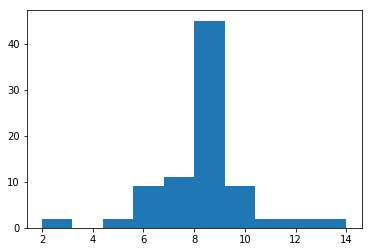

In [62]:
plt.hist([len(d['scope_seeds']) for d in stats_dicts])

(array([  1.,   0.,   0.,   1.,   2.,   4.,   8.,  12.,  25.,  31.]),
 array([ 32. ,  34.9,  37.8,  40.7,  43.6,  46.5,  49.4,  52.3,  55.2,
         58.1,  61. ]),
 <a list of 10 Patch objects>)

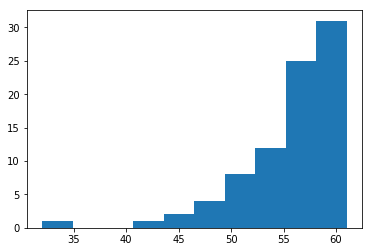

In [65]:
plt.hist([len(d['scope_targets']) for d in stats_dicts])

(array([  2.,   0.,   3.,  10.,   8.,  15.,  13.,  18.,  11.,   4.]),
 array([  161. ,   323.5,   486. ,   648.5,   811. ,   973.5,  1136. ,
         1298.5,  1461. ,  1623.5,  1786. ]),
 <a list of 10 Patch objects>)

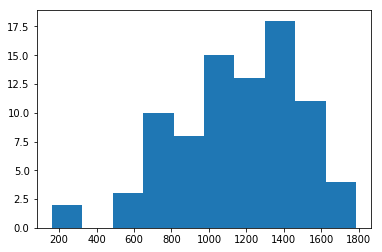

In [63]:
plt.hist([len(d['scope_compounds']) for d in stats_dicts])

(array([  2.,   1.,   7.,   6.,   8.,  16.,  11.,  19.,  11.,   3.]),
 array([   85. ,   241.4,   397.8,   554.2,   710.6,   867. ,  1023.4,
         1179.8,  1336.2,  1492.6,  1649. ]),
 <a list of 10 Patch objects>)

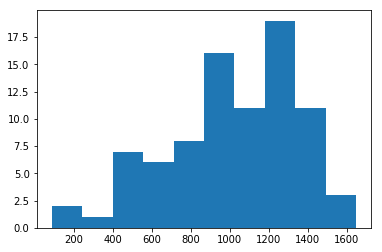

In [64]:
plt.hist([len(d['scope_reactions']) for d in stats_dicts])

### Check if the targets columns were erroneous

#### Add map pathway data too?

#### Adding target data could be done post-processing as well

In [168]:
set(datajson["stats"]["scope_targets"])&set(generations["compounds_cumulative"][25])

set()

In [169]:
generations['compounds_cumulative'].apply(lambda x: [cpd for cpd in datajson["stats"]["scope_targets"] if cpd in x])


1     []
2     []
3     []
4     []
5     []
6     []
7     []
8     []
9     []
10    []
11    []
12    []
13    []
14    []
15    []
16    []
17    []
18    []
19    []
20    []
21    []
22    []
23    []
24    []
25    []
Name: compounds_cumulative, dtype: object

#### They don't appear to be.

## Plot

In [177]:
def cool_plots(df,line1,line2):

    # Create traces
    trace0 = go.Scatter(
        x = df.index,
        y = df[line1],
        mode = 'lines+markers+text',
        name = line1,
        text=df['tags'],
        textposition='top center'
    #     text= data['state']
    )
    trace1 = go.Scatter(
        x = df.index,
        y = df[line2],
        mode = 'lines+markers',
        name = line2
    )

    data = [trace0,trace1]
    plotly.offline.iplot(data)

In [41]:
df["org_id"].unique()

array(['2506520044', '2506783009', '2517287024', '2529293002',
       '2529293211', '2531839260', '2554235474', '2554235476',
       '2554235477', '2554235490', '2554235497', '2718217646',
       '2718217664', '2718217665', '2718217666', '2718217667',
       '2721755430', '2721755431', '2721755892', '2721755895',
       '2724679803', '2728369738', '2739367758', '2740891997', '638154515',
       '644736411', '644736412', '650716079', '2515154133', '2515154138',
       '2515154140', '2515154141', '2515154152', '2517572146',
       '2518645608', '2518645611', '2519899518', '2521172661',
       '2523533532', '2523533546', '2523533611', '2523533612',
       '2524614558', '2524614663', '2524614672', '2524614757',
       '2524614857', '2524614862', '2524614884', '2540341173',
       '2546825502', '2546825503', '2558309102', '2563366730',
       '2565956515', '2565956590', '2571042909', '2574179701',
       '2574179723', '2574180435', '2574180450', '2582580728',
       '2582581268', '258258127

In [46]:
def cool_plots_many(df,attribute):
    traces = []
    for i in df["org_id"].unique():
        
        traces.append(go.Scatter(
        x = df.loc[df["org_id"]==i].index,
        y = df.loc[df["org_id"]==i][attribute],
        mode = 'lines+markers',
        name = attribute
        ))
    plotly.offline.iplot(traces)   

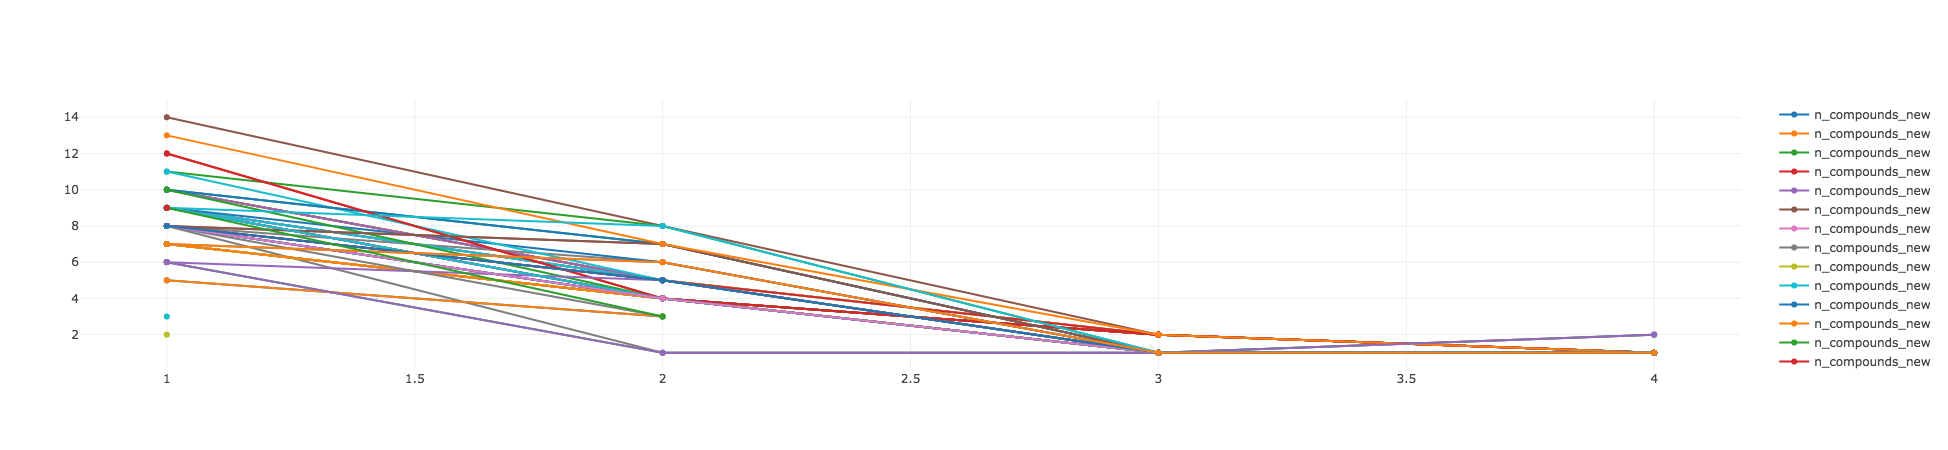

In [47]:
cool_plots_many(df,'n_compounds_new')

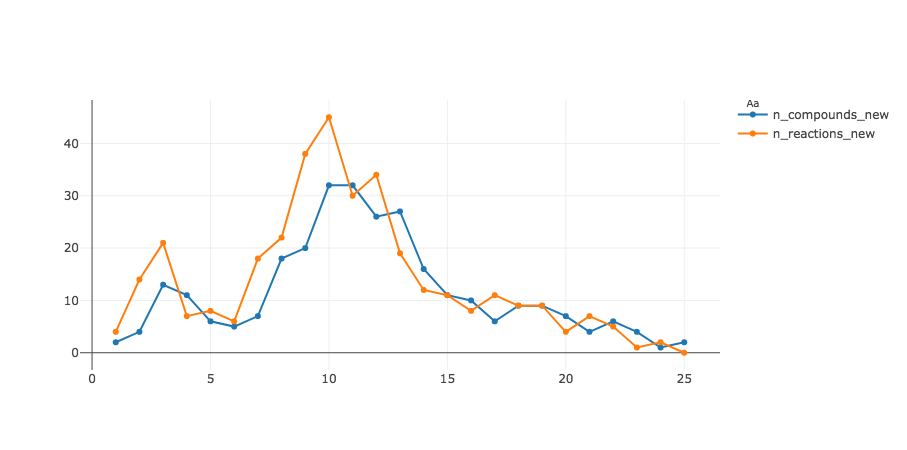

In [178]:
cool_plots(generations,'n_compounds_new','n_reactions_new')

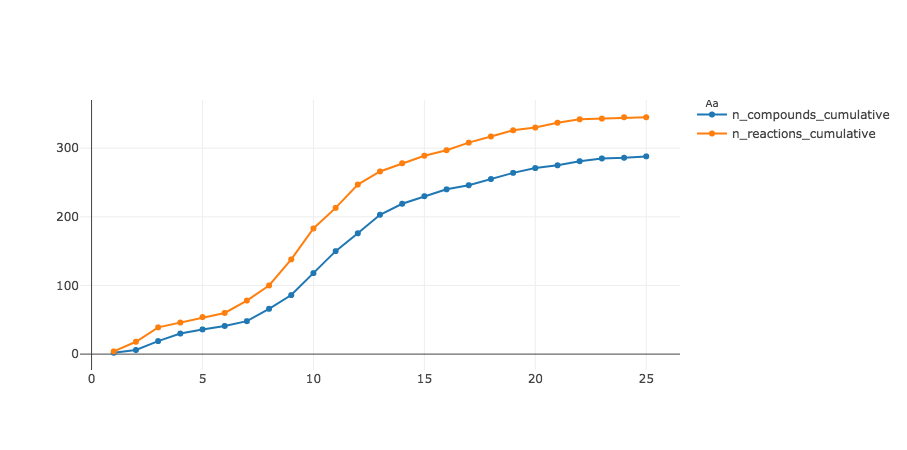

In [179]:
cool_plots(generations,'n_compounds_cumulative','n_reactions_cumulative')